1. Welcome to RezBaz Machine Learning: From Zero to Hero
---------------------------------------------------------

Lets start by doing some machine learning! 

But first, lets generate some data so we know how well we have solved the problem

We will be using `numpy`, `pandas`, `scikit-learn` and `matplotlib`


In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline 


## House Prices
We are interested in trying to estimate the price of a house. For our initial demo, lets assume that house prices are determined by a function that we will invent. Let's assume that the only variables that are important for a house price is:

- The footprint of the house in m^2
- The house type (apartment, townhouse, freestanding)
- Distance to the nearest CBD in km
- An estimate of building quality (poor, ok, good) 

The function I invented for this is below, feel free to change the parameters to whatever you like

In [2]:
true_parameters = {'fpWeight': 10, # Footprint weight
                   'bias': 50,  # helps control the mean 
                   'scale': 10000,  # Move the function to the right scale
                   'houseTypeWeight': {'townhouse': 1, 'apartment': 0.7, 'freestanding': 1.4 },
                   'nearestCBD': 10,
                   'buildingQuality': {'poor': 0.8, 'ok': 1, 'good': 1.2}
                  }


def house_price(footprint, house_type, distance_to_cbd, quality, tp):
    """
    Function to calculate house prices:
    Inputs:
    footprint: A float indicating how much square feet the house has
    house_type: a string, either 'townhous','apartment' or 'freestanding'
    nearestCBD: A float, indicating how far to the nearest cbd
    buildingQuality: A string, either 'poor', 'ok' or 'good'
    tp: A dictionary containing the parameters for the model. 
    returns: A floating point number indicating how much the house will sell for.
    """
    
    price = tp['fpWeight']*footprint + tp['nearestCBD']* (50-distance_to_cbd) + tp['bias']
    
    price = price*tp['houseTypeWeight'][house_type]
    price = price*tp['buildingQuality'][quality]
    price = price * tp['scale']
    return price

## Generating Simulated Data
 
To get ready to do machine learning we need to collect data. Since we are (for now) going to assume the model above is true, we can generate as much data as we want from that function and see how well our machine learning will perform. 



In [3]:
footprints = np.arange(50, 150, 5)
distances = np.arange(1,50,1)
priceVfootprint = house_price(footprints, 'apartment', 1, 'ok', true_parameters)
priceVdistance = house_price(75, 'apartment',distances,'ok', true_parameters)




In [4]:
numberOfTraining = 1000
numberofValid = 100
numberOfTesting = 1000

In [5]:
def create_data(numberOfSamples):
    footprints = np.random.rand(numberOfSamples)*150  # Assume 150m**2 is the biggest house
    distances = np.random.rand(numberOfSamples)*70    # Assume 70kms is the furthes from the CBD
    houseType = np.random.choice(['apartment', 'townhouse','freestanding'], numberOfSamples)
    quality = np.random.choice(['poor','ok','good'], numberOfSamples)
    # Create a pandas dataframe, with columns named using the keys from the input dictionary
    randData = pd.DataFrame({'footprint':footprints, 
                             'distanceToCBD':distances, 
                             'houseType':houseType,
                             'buildingQuality':quality})
    
    # Helper function to apply the house price function over the rows of the dataframe
    def apply_house_price(row):
        return house_price(row.footprint, row.houseType, row.distanceToCBD, row.buildingQuality, true_parameters)
    
    # Apply the help function to each row of the dataframe (columns are axis 0, while rows are axis 1)
    price = randData.apply(apply_house_price,axis=1)
    # Create a new column called price.
    randData['price'] = price
    return randData

training = create_data(numberOfTraining)
test = create_data(numberOfTesting)

training  # Jupyter notebook will show the value of the last value

,buildingQuality,distanceToCBD,footprint,houseType,price
0,good,24.609966,88.679272,freestanding,2.000364e+07
1,poor,55.331715,79.497850,freestanding,8.866607e+06
2,ok,53.565431,59.368545,townhouse,6.080311e+06
3,ok,27.990410,80.715603,apartment,7.540763e+06
4,poor,16.118465,40.572052,townhouse,6.356287e+06
5,poor,54.252392,10.824690,freestanding,1.296097e+06
6,poor,4.315060,138.486739,apartment,1.059361e+07
7,poor,11.661051,113.301956,apartment,8.771891e+06
8,ok,55.280125,102.752688,apartment,7.173079e+06
9,ok,46.314548,108.845681,apartment,8.227179e+06


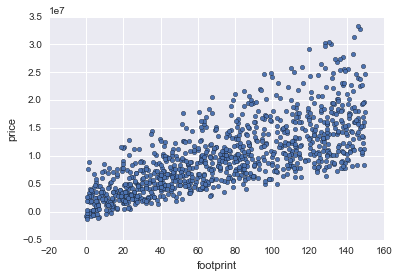

In [6]:
# Plot the footprint vs price
training.plot(x='footprint', y='price', kind='scatter')

Cool, so the data looks kind of linear but not quite. Notice that the variance in prices increases as the footprint goes up. 
Visualising Categorical data is abit more tricky. 

C:\Users\johnvial\Anaconda2\lib\site-packages\seaborn\categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


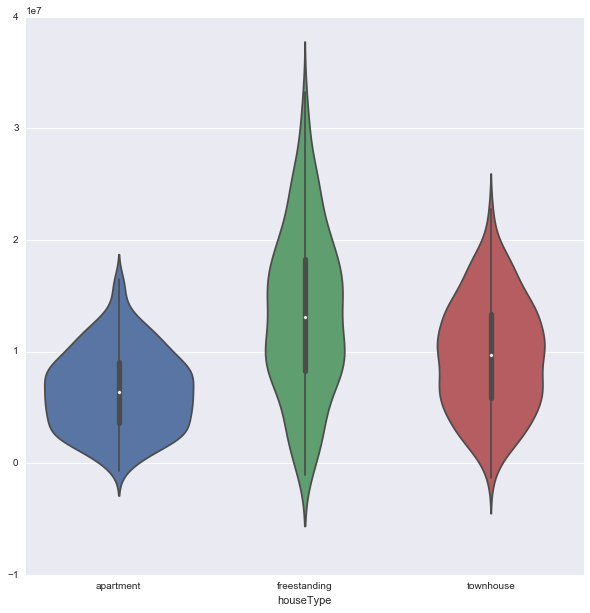

In [7]:
plt.figure(figsize=(10,10))
sns.violinplot(training.pivot(columns='houseType',values='price'))

# Q1: Plot the data set
Generate some plots of the data. Produce plots of:

distanceToCBD vs price

buildngQuality vs price




## Q2: Modify the parameters

Modify the parameters of the true_parameters dictionary to reflect what you think is reasonable. 

# Train, Test and Validation. 

We'll begin by setting aside some of the training data as a validation or hold-out data set. This set will be used to help us improve our model, but we will reserve the test data for our final check.

We're also going to split our dataframe into the "features" (X) and the targets (y). 

Of course, since we have generated this data we could just make more. However, for real problems this is not an option as data is quite expensive to aquire. 

Note that we don't want the order that the data came in to effect our results, so we should randomly select new data and shuffle the new datasets. 

Fortunately scikit learn provides some handy helper functions for this:

`train_test_split`

In [8]:
from sklearn.model_selection import train_test_split
X = training[['footprint','distanceToCBD','houseType','buildingQuality']]
y = training.price

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.1)  #Keep 10% of the data for validation


# Your first scikit learn model

Let't try to fit a linear function to the data, but only using the distanceToCBD as a guide. 

In [9]:
from sklearn import linear_model

model = linear_model.LinearRegression() # Lets use the simplest model, y=Ax+b!


## Key concept: fit

Machine learning models are trained on data. This process is often referred to as "fitting the model". Scikit learn estimators offer a `fit` method that does this. Simply give the method the data and predicted labels, and it will attempt to find the best fitting paramaters. 

Lets fit the linear model on the training data. Note that we want to only give the model the `distanceToCBD` variable.

In [10]:
x1 = X_train['distanceToCBD'].values.reshape(900,1)
x2 = X_valid['distanceToCBD'].values.reshape(100,1)

y1 = y_train.values.flatten()
y2 = y_valid.values.flatten()

model.fit(x1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Key Concept: predict
The main output from a machine learning model is a prediction. This isn't neccarily about the future, often it can just be about things in the past that we haven't directly observed. We use the `predict` method to get predictions from the model. 



In [11]:
y_pred = model.predict(x1)

## Q3: What happens if you use an estimator before you fit it?
Plot the predictions of a new LinearRegression object before and after it has been fit to the data. 

## Key concept: Measuring performance.
So we've trained a model and gotten some predictions. We can graph these (and we should!) but we need to pick a measure to test how well we have performed. In regression, its common to do Sum of squared error and also R2_score. So lets use those. 

Go and look at http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics to learn about different metrics. For Sum of squares, lower is better, and for R2, closer to 1 is better. 

It's important to choose a metric so you can evaluate your performance. 

Lets also quickly write a function to print this out for us.

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

def print_model_performance(y_predicted, y_true):

    print( "Mean squared error = {}".format( mean_squared_error(y_true, y_predicted)))
    print( "R2_score           = {}".format(r2_score(y_true, y_predicted)))


It's important to measure your performance on data that the model hasn't seen. This is the purpose of the validation set. 

In [13]:
y_pred_valid = model.predict(x2)
print_model_performance(y_pred_valid, y_valid.values)

Mean squared error = 3.88267556683e+13
R2_score           = 0.140884978617


## Adding more features

So the previous model performed not very well just using one feature. Lets try adding the second feature and see how things improve.

In [14]:
x1_2features = X_train[['distanceToCBD', 'footprint']]
x2_2features = X_valid[['distanceToCBD', 'footprint']]

model.fit(x1_2features, y1)
y_pred_2feat = model.predict(x2_2features)
print_model_performance(y_pred_2feat, y_valid.values)

Mean squared error = 1.72491048794e+13
R2_score           = 0.618331100494


So adding more information has dramatically improved the models accuracy, yes!


## Q4a: What effect would changing the weights in our original function have on the prediction?



## Q4b: What would happen if we increased the weighting on houseType?




## Key concept: Rescaling data & `transform`

It's often easier for machine learning models to learn data that has been normalised, and some techniques assume it. To make it easier for our model we should normalise our inputs. 

We're going to use scikit learns normalise object. This object has a new method called `transform` that applies its transform to the data. This is like `predict` except it's for mathematical transforms.


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x1_2features)
x_norm = scaler.transform(x1_2features)
x2_norm = scaler.transform(x2_2features)

In [16]:
model.fit(x_norm,y1) # Fit the model on the normalised data
y_norm_pred = model.predict(x2_norm)
print_model_performance(y_norm_pred, y_valid.values)

Mean squared error = 1.72491048794e+13
R2_score           = 0.618331100494


It seems that normalising hasn't effected the output. However for more complex models it is important. 


## Key concept: one hot encoding

Our model performed better when we gave it more features, but how can we handle the categorical features of `buildingQuality` and `houseType`. The answer is to use a one-hot encoding. 

This basically converts our list of possible outcomes into a binary vector. For example, the `buildingQuality` feature has 3 states, `poor`,`ok` and `good`. A one hot encoding will create a new 3x1 vector. To encode `poor` the vector would be [1,0,0], while to encode good it might be [0,0,1]. Note that a vector of [1,1,0] would be invalid as a house cannot be both poor and ok quality at the same time.

We can use the sklearn's `LabelBinarizer` class to perform this task.

In [17]:
from sklearn.preprocessing import LabelBinarizer

trainQuality = X_train['buildingQuality'].values
print('Input data')
print(trainQuality[0:5])
binarizer = LabelBinarizer()
binarizer.fit(trainQuality)

binarized = binarizer.transform(trainQuality)
print('Binarized data')
print(binarized[0:5,:])

Input data
['ok' 'poor' 'ok' 'poor' 'ok']
Binarized data
[[0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]]


To make our life easier, we are going to use a library sklearn-pandas that allows us to specify how the input variables should be transformed.  We are going to use the dataframe mapper to help us map all of our data into a new the arrays that SKlearn expects. We'll also do it for the previous features while we are at it.

In [18]:
from sklearn_pandas import DataFrameMapper

# We tell the DataFrameMapper the names of the columns and how we would like to transform them. 
mapper = DataFrameMapper([
    (['distanceToCBD', 'footprint'], StandardScaler()),   # Apply a standard scaling to the distance and footprint colunms
    ('buildingQuality', LabelBinarizer()),
    ('houseType', LabelBinarizer())
    ])

In [19]:
# We can now quickly get our new feature vector. 
mapper.fit(X_train)
print(mapper.transform(X_train))

[[-1.46820905 -0.51327345  0.         ...,  1.          0.          0.        ]
 [-0.15065089 -0.98139679  0.         ...,  0.          1.          0.        ]
 [ 1.42741133 -0.71210056  0.         ...,  0.          1.          0.        ]
 ..., 
 [ 0.26922983 -0.74674229  0.         ...,  0.          1.          0.        ]
 [ 1.05363939 -1.15430478  0.         ...,  0.          1.          0.        ]
 [-0.62275929  0.95219475  0.         ...,  0.          0.          1.        ]]


## Scikit Pipelines

Some machine learning models can have many steps. Rather than passing the data into and out of each step we can use a pipeline to allow us to combine all the steps into one. 

The `DataFrameMapper` from sklearn-pandas works nicely with the scikit learn pipelines. Lets combine this with our linear model from before and see how well we can predict the house prices.


In [20]:
from sklearn.pipeline import make_pipeline

# Give make_pipeline a  of objects, but the last one must be an estimator.
pipeline = make_pipeline(mapper, linear_model.LinearRegression())


In [21]:
# We can pass in the training dataframe as the mapper will only select the listed columns.
pipeline.fit(X_train, y1)
y_all_feat = pipeline.predict(X_valid)

print_model_performance(y_norm_pred, y_valid.values)

Mean squared error = 1.72491048794e+13
R2_score           = 0.618331100494


## Improving models
So it seems that after adding all of our data we haven't improved our model. Perhaps the assumption of a linear fit is wrong or perhaps we need to combine our features in different ways.

Lets start by looking at polynomial features. 


In [22]:
def plot_pred_vs_true(X, y_pred, y_true, column='footprint', num_samples=50):
    x = X.footprint
    sampleRate = np.array(np.floor(x.size/float(num_samples)), dtype='int')
    sampleIndex = np.arange(0, x.size-1, sampleRate)
    sampleIndex = sampleIndex[np.argsort(x.iloc[sampleIndex])]
    x=x.iloc[sampleIndex]
    
    y_true = y_true[sampleIndex]
    y_pred = y_pred[sampleIndex]
    fig = plt.figure(figsize=(10,10))
    
    plt.plot(x, y_true, label='true')
    plt.plot(x, y_pred, label='predicted')
    plt.xlabel(column)
    plt.ylabel('price')
    plt.legend()
    plt.title('{} vs price'.format(column))
    
    

In [23]:
#Lets write a function to make evaluating over our models easier. 
def fit_and_evaluate_pipeline(pipe, X_train, y_train, X_test, y_test):
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    plot_pred_vs_true(X_test, y_pred, y_test)
    print_model_performance(y_pred, y_test)
    
# Lets make a convenience function that will just use the train and validation sets. 

def eval_pipe(pipe):
    fit_and_evaluate_pipeline(pipe, X_train, y_train.values, X_valid, y_valid.values)

C:\Users\johnvial\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\johnvial\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\johnvial\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a s

Mean squared error = 3.88267556683e+13
R2_score           = 0.140884978617


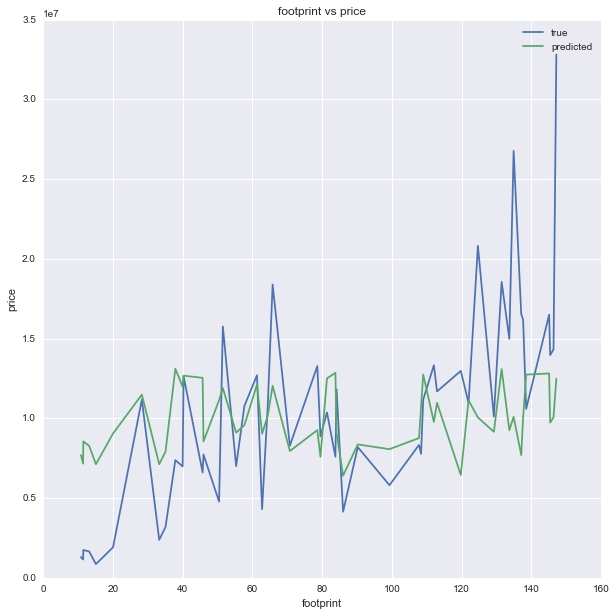

In [24]:
simpleLinearPipe = make_pipeline(DataFrameMapper([('distanceToCBD', StandardScaler())]), linear_model.LinearRegression())
eval_pipe(simpleLinearPipe)

Mean squared error = 3.50816464594e+12
R2_score           = 0.922375256626


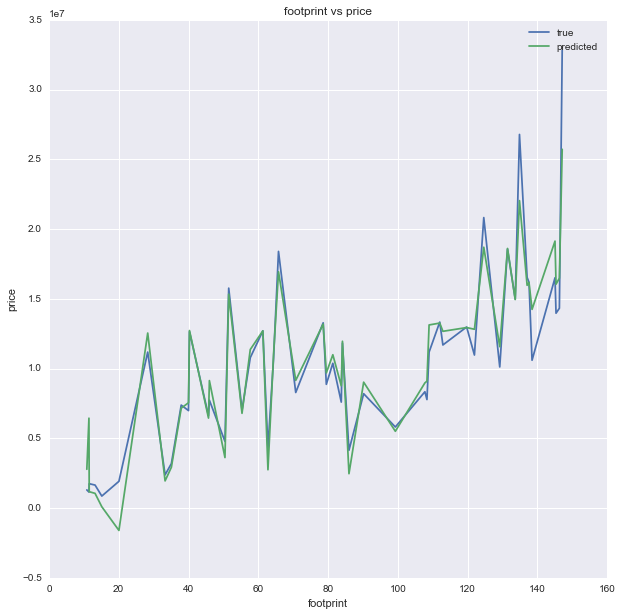

In [25]:
linearPipe = make_pipeline(mapper, linear_model.LinearRegression())
eval_pipe(linearPipe)

## Experimenting feature transforms

Sometimes its helpful to combine features to make more features, othertimes its helpful to combine features to reduce the number of features. 

Lets experiment by adding a feature transformation as an intermediate step in our pipeline. 

Let's try increasing the number of features by using a ploynamial feature transform. See the documentation here:

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures




In [26]:
from sklearn.preprocessing import PolynomialFeatures

polyPipe2 = make_pipeline(mapper, PolynomialFeatures(degree=2), linear_model.LinearRegression())

#eval_pipe(polyPipe2)


## Feature reduction

We can try a feature decomposition. Look at the docs here:

http://scikit-learn.org/stable/modules/decomposition.html#decompositions

Let's try using a Principle Component Analysis (http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)

Mean squared error = 3.50816464594e+12
R2_score           = 0.922375256626


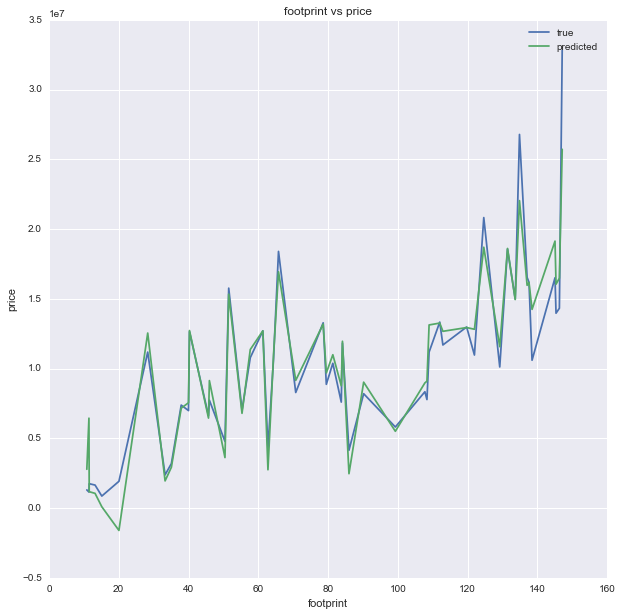

In [27]:
from sklearn.decomposition import PCA
pcaPipe = make_pipeline(mapper, PCA(), linear_model.LinearRegression())
eval_pipe(pcaPipe)

## Using different estimators

We can also change the estimator that is at the end of the pipeline. 

Lets try using a decision tree:
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor


Mean squared error = 1.50587421891e+12
R2_score           = 0.966679699617


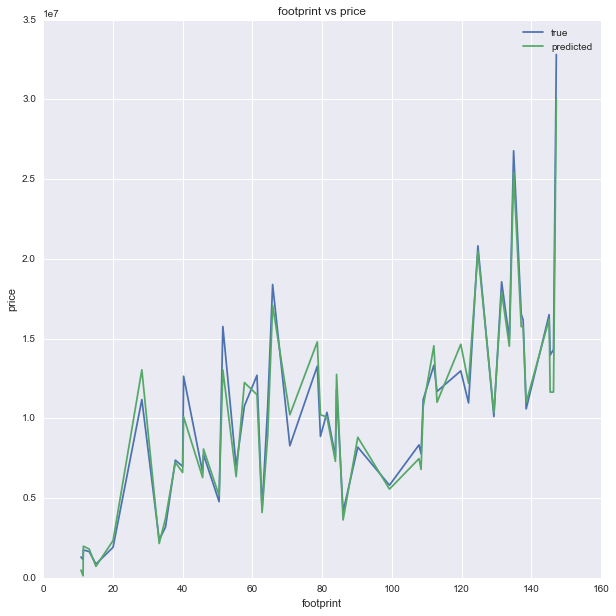

In [28]:
from sklearn.tree import DecisionTreeRegressor


rForest = make_pipeline(mapper, DecisionTreeRegressor())
    
eval_pipe(rForest)


## Let's build our own pipeline!

Choose your own pipeline structure. Consider any kind of feature transform and estimator. Be careful, some estimators are both more powerful but also more computationally expensive. 

## Q5: Build 3 different pipelines

Build 3 different pipelines. Try to use 3 different estimators. Find an estimator from the scikit learn library that we haven't used yet!



## Much better!

Wow with an R2 score of close to 1 I would say we are nearly finished. The final thing is to test it on our 1 use only test data and see what our final score is.


In [29]:
y_test = test['price'].values
X_test = test[['footprint','distanceToCBD','houseType','buildingQuality']]

# This time we must be careful only to predict on the test set. 
y_test_prediction = best_pipe.predict(X_test)
print_model_performance(y_test_prediction, y_test)

NameError: name 'best_pipe' is not defined

# Missing Data

Real-world datasets often have missing data. It's quite tricky to decide what to do. One approach is to discard all samples with missing data, but that can sometimes leave you with NO data!
Another approach is to use "imputation" to replace missing data with the mean of their column. One approach for categorical data is to create a new category to flag data as missing. What approach you take will effect your models performance and is problem dependent. 

Let's remove some data from our training dataset. 

In [ ]:
def make_missing_data_column(df, percent_missing, column_name):
    df = df.copy()

    num_samples = df.shape[0]
    num_missing_samples = np.floor(num_samples*percent_missing)

    missingIndicies = df.index[np.random.choice(np.arange(0,df.shape[0]), num_missing_samples)]
    df.loc[missingIndicies,column_name] = np.NaN
    
    return df

def make_missing_data(df, percent_missing, col_list):
    df = df.copy()
    for c in col_list:
        df = make_missing_data_column(df, percent_missing, c)
    return df

X_train_miss = make_missing_data(X_train, 0.1, ['footprint', 'buildingQuality'])
X_valid_miss = make_missing_data(X_valid, 0.1, ['footprint','buildingQuality'])



# Try previous pipeline on new data.

So we get an error. We will need to deal with them. For the `buildingQuality` lets create a new "missing" label. 

In [ ]:
X_train_miss.loc[:,'buildingQuality'].fillna('missing', inplace=True)
X_valid_miss.loc[:,'buildingQuality'].fillna('missing', inplace=True)



For the numeric, lets replace the missing values by the column mean. 

In [ ]:
X_train_miss.loc[:,'footprint'].fillna(X_train_miss.footprint.mean(), inplace=True)
X_valid_miss.loc[:,'footprint'].fillna(X_valid_miss.footprint.mean(), inplace=True)

In [ ]:
def eval_pipe_on_missing(pipe):
    fit_and_evaluate_pipeline(pipe, X_train_miss, y_train.values, X_valid_miss, y_valid.values)
    
eval_pipe_on_missing(best_pipe_miss)

# ASSIGNMENT:  Kaggle competition

The task we have just done is similar to the Kaggle competition. 

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

We are going to submit an entry to the above kaggle competition, using the same approach that we used in the previous section. 

Start by signing up and downloading the housing data. 



In [ ]:
data = pd.read_csv('train.csv')
data

## Step 1: Break data into train and validation sets. 
Keep 20% of the data for validation. Lets also keep another 10% for a hold-out. 

In [ ]:
columns = data.columns.tolist()
columns.remove('SalePrice')

X = data[columns]
y = data.SalePrice


#X_rest, X_hold, y_rest, y_hold = train_test_split(X,y,test_size=0.1)
#X_train, X_valid, Y_train, y_valid = train_test_split(X_rest, y_rest, test_size=0.2)

# Step 2: Choose some columns and visualise the data

# Step 3: Choose a metric

# Step 4: Deal with missing data 

# Step 5: Build a prediction pipeline

# Step 6: Predict on validation set.

# Step 7: Iterate on solution

# Step 8: Final validation on holdout set

# Step 10: Apply on Kaggle test set.

# Step 11: Submit to Kaggle